In [1]:
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import re
import time
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

[nltk_data] Downloading package punkt to C:\Users\TAI
[nltk_data]     EMMANUEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\TAI
[nltk_data]     EMMANUEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TAI
[nltk_data]     EMMANUEL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\TAI
[nltk_data]     EMMANUEL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('C:\\Users\\TAI EMMANUEL\\Documents\\Tai.Inc\\PG\\Second Semester\\Project\\Data\\Dataset.csv')

df.head()

C:\Users\TAI EMMANUEL\AppData\Local\Temp\ipykernel_11260\1007216142.py:1: DtypeWarning: Columns (4,6,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\TAI EMMANUEL\\Documents\\Tai.Inc\\PG\\Second Semester\\Project\\Data\\Dataset.csv')


,User_name,location,Date Created,Number of Likes,Source of Tweet,Tweet,name,tweet_id,Text,created_at,author_id,retweet_count,reply_count,like_count,quote_count,impression,tweet_url
0,PrinceReal9,"Kano, Nigeria",2022-08-26 23:59:50+00:00,4.0,Twitter for Android,"@renoomokri Truth be told, if you go through a...",Obi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IAmDavidMark041,On Exile,2022-08-26 23:59:44+00:00,0.0,Twitter for Android,@fkeyamo Senior Advocate of Nonsense and Fake ...,Obi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BishopDarey,NaN,2022-08-26 23:59:36+00:00,0.0,Twitter for iPhone,@Emma_Obaseki @ctsar_ct @jhonoguyng @Jujufores...,Obi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ezennia98504565,"Enugu, Nigeria",2022-08-26 23:59:28+00:00,0.0,Twitter for Android,@Lagbajaomotamed @AdebowaleShogb3 @PeterObi Om...,Obi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Akons16226058,NaN,2022-08-26 23:59:23+00:00,0.0,Twitter for Android,@taajoowolabi @renoomokri You like it or not P...,Obi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape[0]

443980

In [5]:
df.Tweet.head()

0    @renoomokri Truth be told, if you go through a...
1    @fkeyamo Senior Advocate of Nonsense and Fake ...
2    @Emma_Obaseki @ctsar_ct @jhonoguyng @Jujufores...
3    @Lagbajaomotamed @AdebowaleShogb3 @PeterObi Om...
4    @taajoowolabi @renoomokri You like it or not P...
Name: Tweet, dtype: object

In [6]:
df.drop_duplicates(subset=['Tweet'], inplace=True)

df.shape[0]

411341

In [7]:
443980 - 411341

32639

In [4]:
df['Date Created'] = pd.to_datetime(df['Date Created'], errors='coerce')

# Drop rows where 'Date Created' could not be converted to datetime
df.dropna(subset=['Date Created'], inplace=True)

# Extracting date, time, and month
df['Date'] = df['Date Created'].dt.date
df['Time'] = df['Date Created'].dt.time
df['Month'] = df['Date Created'].dt.month
df['Year'] = df['Date Created'].dt.year

In [5]:
df.columns

Index(['User_name', 'location', 'Date Created', 'Number of Likes',
       'Source of Tweet', 'Tweet', 'name', 'tweet_id', 'Text', 'created_at',
       'author_id', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'impression', 'tweet_url', 'Date', 'Time', 'Month',
       'Year'],
      dtype='object')

In [6]:
columns_to_drop = ['Source of Tweet', 'quote_count', 'author_id', 'tweet_id', 'reply_count', 'author_id', 'retweet_count', 'Number of Likes', 'created_at', 'tweet_url','impression','Date Created','User_name']

df.drop(columns=columns_to_drop, inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443980 entries, 0 to 443979
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   User_name        421180 non-null  object 
 1   location         276603 non-null  object 
 2   Date Created     443980 non-null  object 
 3   Number of Likes  411180 non-null  float64
 4   Source of Tweet  411180 non-null  object 
 5   Tweet            443980 non-null  object 
 6   name             411180 non-null  object 
 7   tweet_id         22800 non-null   float64
 8   Text             0 non-null       float64
 9   created_at       0 non-null       float64
 10  author_id        22800 non-null   object 
 11  retweet_count    32800 non-null   float64
 12  reply_count      22800 non-null   float64
 13  like_count       22800 non-null   float64
 14  quote_count      22800 non-null   float64
 15  impression       22612 non-null   float64
 16  tweet_url        32800 non-null   obje

In [8]:
columns_to_drop = ['like_count', 'Text']

df.drop(columns=columns_to_drop, inplace=True)

In [9]:
# Function to preprocess a single tweet
def preprocess_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    filtered_words = [word for word in word_tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    # Join words back into one string
    processed_tweet = ' '.join(lemmatized_words)
    return processed_tweet

# Apply the preprocessing function to the 'Tweet' column
df['cleaned_tweet'] = df['Tweet'].apply(preprocess_tweet)

# Display the first few rows to verify the new column
print(df[['cleaned_tweet']].head())

                                       cleaned_tweet
0  truth told go reno tweet doesnt peter obi alwa...
1                 senior advocate nonsense fake news
2                                             lol ok
3  omo anambra imo state respectively rank litera...
4            like pdp apc time without obidient move


In [10]:
columns_to_drop = ['Tweet']

df.drop(columns=columns_to_drop, inplace=True)

In [11]:
candidate_keywords = {
    'Obi': ['peter obi', 'obi'],
    'Tinubu': ['bola ahmed tinubu', 'bola tinubu', 'tinubu'],
    'Atiku': ['atiku abubakar', 'atiku']
}

# Function to extract candidate names from a tweet
def extract_candidate_names(tweet):
    tweet_lower = tweet.lower()
    found_candidates = []
    for candidate, keywords in candidate_keywords.items():
        if any(keyword in tweet_lower for keyword in keywords):
            found_candidates.append(candidate)
    # Return only the first found candidate
    return found_candidates[0] if found_candidates else ''

# Apply the function to the 'cleaned_tweet' column and create a new column 'Candidate_name'
df['Candidate_name'] = df['cleaned_tweet'].apply(extract_candidate_names)

# Display the first few rows of the dataframe to verify
print(df[['cleaned_tweet', 'Candidate_name']].head())

                                       cleaned_tweet Candidate_name
0  truth told go reno tweet doesnt peter obi alwa...            Obi
1                 senior advocate nonsense fake news               
2                                             lol ok               
3  omo anambra imo state respectively rank litera...               
4            like pdp apc time without obidient move            Obi


In [12]:
#Drop duplicates in Cleaned tweet column

df = df.drop_duplicates(subset=['cleaned_tweet'])

df.shape[0]


355037

In [13]:
# Function to get sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the 'Tweets' column
df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

df.sentiment.head()

0    positive
1    negative
2    positive
3    negative
4     neutral
Name: sentiment, dtype: object

In [15]:
# Save the preprocessed DataFrame to a new CSV file
output_path = 'C:\\Users\\TAI EMMANUEL\\Documents\\Tai.Inc\\PG\\Second Semester\\Project\\Data\\final_dataset.csv'
df.to_csv(output_path, index=False)

# Verify the file has been saved
print("Preprocessed data saved to:", output_path)

# Load the preprocessed data from the CSV file
df = pd.read_csv(output_path)

# Display the first few rows to verify
print(df.head())

Preprocessed data saved to: C:\Users\TAI EMMANUEL\Documents\Tai.Inc\PG\Second Semester\Project\Data\final_dataset.csv


C:\Users\TAI EMMANUEL\AppData\Local\Temp\ipykernel_248\1380027004.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_path)


         location name        Date      Time  Month  Year  \
0   Kano, Nigeria  Obi  2022-08-26  23:59:50      8  2022   
1        On Exile  Obi  2022-08-26  23:59:44      8  2022   
2             NaN  Obi  2022-08-26  23:59:36      8  2022   
3  Enugu, Nigeria  Obi  2022-08-26  23:59:28      8  2022   
4             NaN  Obi  2022-08-26  23:59:23      8  2022   

                                       cleaned_tweet Candidate_name sentiment  
0  truth told go reno tweet doesnt peter obi alwa...            Obi  positive  
1                 senior advocate nonsense fake news            NaN  negative  
2                                             lol ok            NaN  positive  
3  omo anambra imo state respectively rank litera...            NaN  negative  
4            like pdp apc time without obidient move            Obi   neutral  


In [2]:
df = pd.read_csv('C:\\Users\\TAI EMMANUEL\\Documents\\Tai.Inc\\PG\\Second Semester\\Project\\Data\\final_dataset.csv')

C:\Users\TAI EMMANUEL\AppData\Local\Temp\ipykernel_5272\1982785877.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\TAI EMMANUEL\\Documents\\Tai.Inc\\PG\\Second Semester\\Project\\Data\\final_dataset.csv')


In [3]:
df.columns

Index(['location', 'name', 'Date', 'Time', 'Month', 'Year', 'cleaned_tweet',
       'Candidate_name', 'sentiment'],
      dtype='object')

In [11]:
df.cleaned_tweet.head(7)

0    truth told go reno tweet doesnt peter obi alwa...
1                   senior advocate nonsense fake news
2                                               lol ok
3    omo anambra imo state respectively rank litera...
4              like pdp apc time without obidient move
5    peter obi stop deceiving people revolution way...
6      majority labour party senate rep guy na scammer
Name: cleaned_tweet, dtype: object

V I S U A L I Z A T I O N

  sentiment   count  percentage
0   neutral  161877   45.594403
1  positive  132587   37.344558
2  negative   60573   17.061039


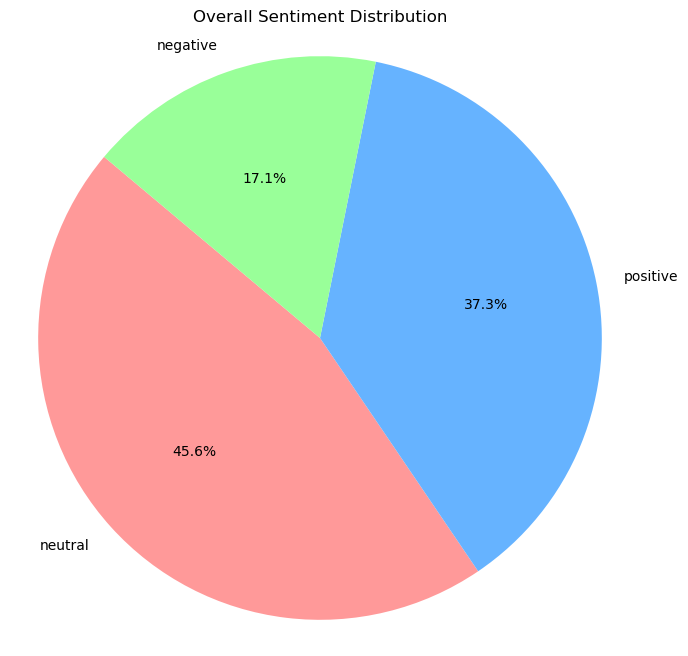

In [18]:
# Calculate the overall count and percentage of each sentiment
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']
sentiment_counts['percentage'] = (sentiment_counts['count'] / sentiment_counts['count'].sum()) * 100

# Display the sentiment counts and percentages
print(sentiment_counts)

# Create a pie chart for the overall sentiments
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts['count'], labels=sentiment_counts['sentiment'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Overall Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

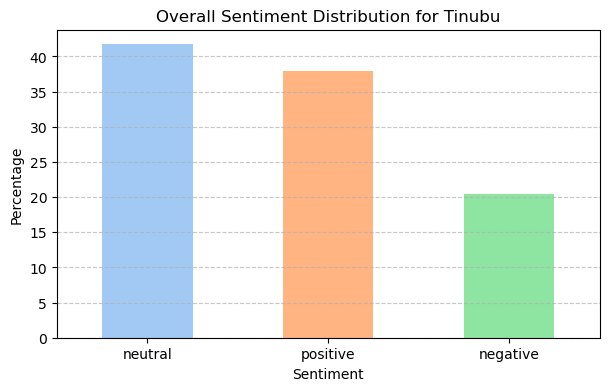

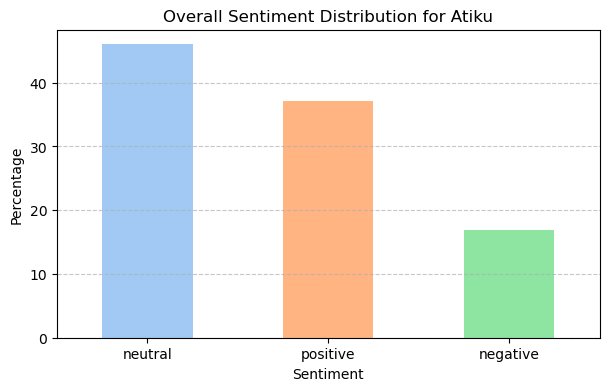

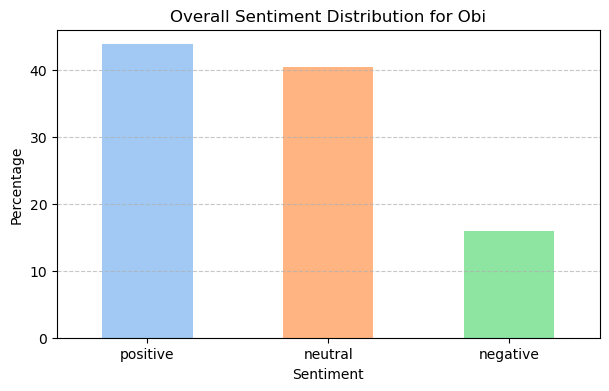

In [7]:
def plot_overall_sentiments(candidate_name, data):
    # Filter the data for the given candidate
    df_candidate = data[data['Candidate_name'] == candidate_name]
    
    # Calculate the percentage of each sentiment
    sentiment_counts = df_candidate['sentiment'].value_counts(normalize=True) * 100
    
    # Plot the sentiment distribution
    plt.figure(figsize=(7,4))
    ax = sentiment_counts.plot(kind='bar', color=sns.color_palette('pastel'))
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.title(f'Overall Sentiment Distribution for {candidate_name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.show()

# Plot overall sentiments for Tinubu
plot_overall_sentiments('Tinubu', df)

# Plot overall sentiments for Atiku
plot_overall_sentiments('Atiku', df)

# Plot overall sentiments for Obi
plot_overall_sentiments('Obi', df)

SENTIMENT OF TINUBU OVER THE MONTHS

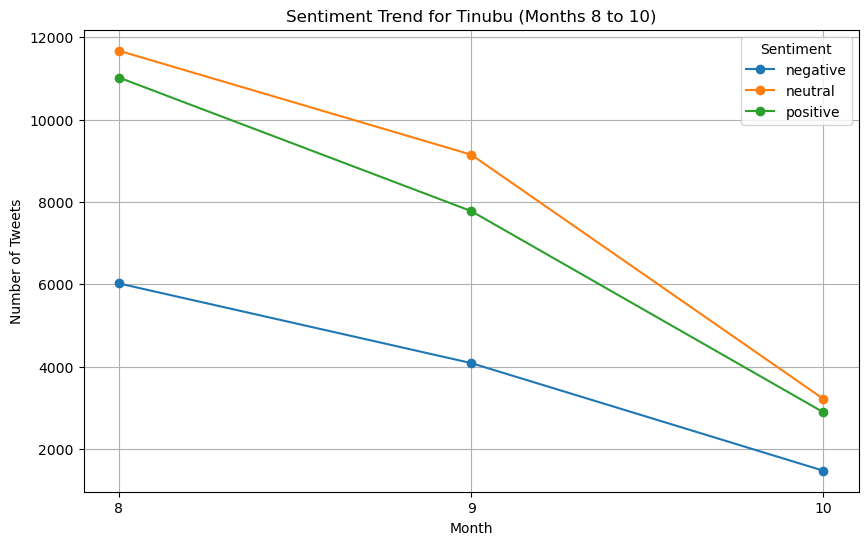

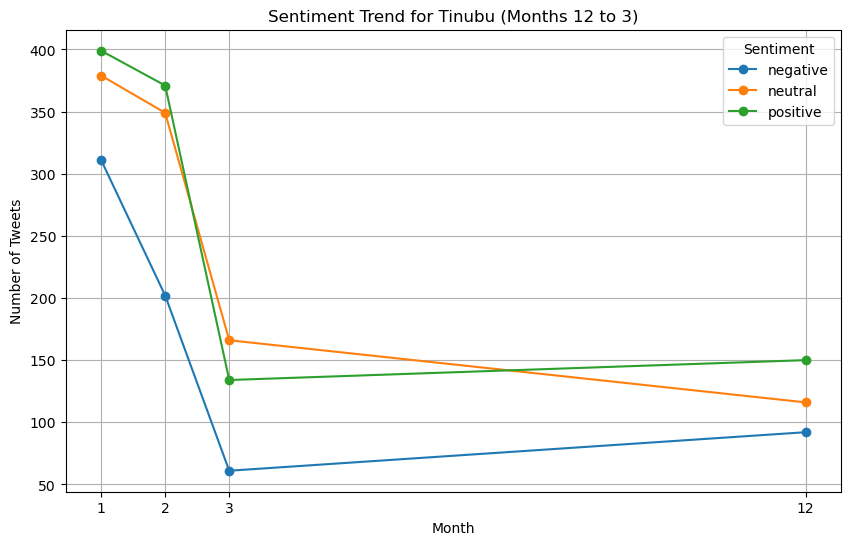

In [22]:
import seaborn as sns

# Filter the DataFrame for the candidate 'Tinubu'
df_tinubu = df[df['Candidate_name'] == 'Tinubu'].copy()

# Convert the 'Month' column to an integer if it is not already
df_tinubu.loc[:, 'Month'] = df_tinubu['Month'].astype(int)

# Function to plot sentiment trends over given months as a line graph
def plot_sentiment_trend_line(data, months, title):
    # Filter data for the given months
    df_filtered = data[data['Month'].isin(months)]
    
    # Group by month and sentiment, then count occurrences
    sentiment_trend = df_filtered.groupby(['Month', 'sentiment']).size().reset_index(name='counts')
    
    # Create a pivot table for easier plotting
    pivot_table = sentiment_trend.pivot_table(index='Month', columns='sentiment', values='counts', fill_value=0)
    
    # Plot the sentiment trend as a line graph
    pivot_table.plot(kind='line', figsize=(10, 6), marker='o')
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Number of Tweets')
    plt.xticks(ticks=months, labels=[str(month) for month in months])
    plt.legend(title='Sentiment')
    plt.grid(True)
    plt.show()

# Plot sentiment trends for months 8 to 10 as a line graph
plot_sentiment_trend_line(df_tinubu, [8, 9, 10], 'Sentiment Trend for Tinubu (Months 8 to 10)')

# Plot sentiment trends for months 12 to 3 as a line graph
# Assuming the data spans from December (12) to March (3) of the next year, we will need to handle this by considering the year
df_tinubu.loc[:, 'Year'] = df_tinubu['Year'].astype(int)
df_dec_to_mar = df_tinubu[(df_tinubu['Month'].isin([12, 1, 2, 3])) & 
                          ((df_tinubu['Month'] == 12) | (df_tinubu['Month'] < 4))]

# Plot sentiment trend for months 12 to 3 as a line graph
plot_sentiment_trend_line(df_dec_to_mar, [12, 1, 2, 3], 'Sentiment Trend for Tinubu (Months 12 to 3)')

In [25]:
# Filter the DataFrame for the candidate 'Tinubu'
df_tinubu = df[df['Candidate_name'] == 'Tinubu'].copy()

# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Calculate sentiment percentage for Tinubu grouped by year
sentiment_percentage_table = calculate_sentiment_percentage(df_tinubu)

# Print the result
print(sentiment_percentage_table)

sentiment    negative    neutral   positive
Year Month                                 
2022 8      20.972909  40.646981  38.380110
     9      19.453827  43.532042  37.014130
     10     19.441149  42.414657  38.144194
     12     25.698324  32.402235  41.899441
2023 1      28.558310  34.802571  36.639118
     2      21.908894  37.852495  40.238612
     3      16.897507  45.983380  37.119114


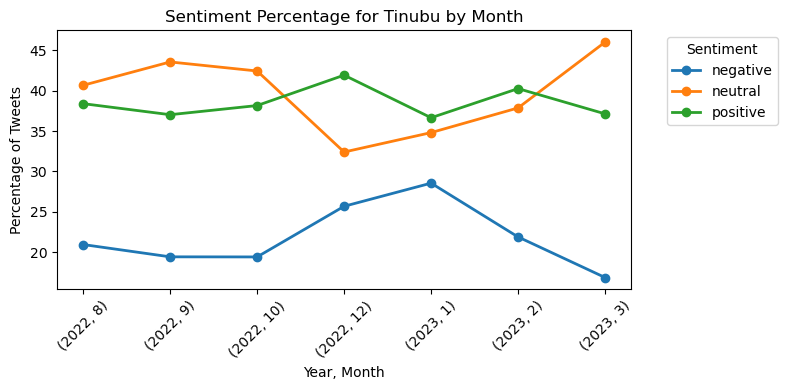

In [10]:
# Filter the DataFrame for the candidate 'Tinubu'
df_tinubu = df[df['Candidate_name'] == 'Tinubu'].copy()

# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Calculate sentiment percentage for Tinubu grouped by year
sentiment_percentage_table = calculate_sentiment_percentage(df_tinubu)

# Plot the result
def plot_sentiment_percentage(data, title):
    data.plot(kind='line', figsize=(8, 4), marker='o', linewidth=2, markersize=6)
    plt.title(title)
    plt.xlabel('Year, Month')
    plt.ylabel('Percentage of Tweets')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
# Plot sentiment percentage for Tinubu
plot_sentiment_percentage(sentiment_percentage_table, 'Sentiment Percentage for Tinubu by Month')

In [26]:
# Filter the DataFrame for the candidate 'Atiku'
df_atiku = df[df['Candidate_name'] == 'Atiku'].copy()

# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Calculate sentiment percentage for Atiku grouped by year
sentiment_percentage_table_atiku = calculate_sentiment_percentage(df_atiku)

# Print the result
print(sentiment_percentage_table_atiku)

sentiment    negative    neutral   positive
Year Month                                 
2022 8      17.027132  46.235542  36.737326
     9      16.588863  45.893075  37.518062
     10     16.649883  46.240349  37.109768
     12     28.244275  32.824427  38.931298
2023 1      24.675325  35.930736  39.393939
     2      28.888889  31.851852  39.259259
     3       2.941176  70.588235  26.470588


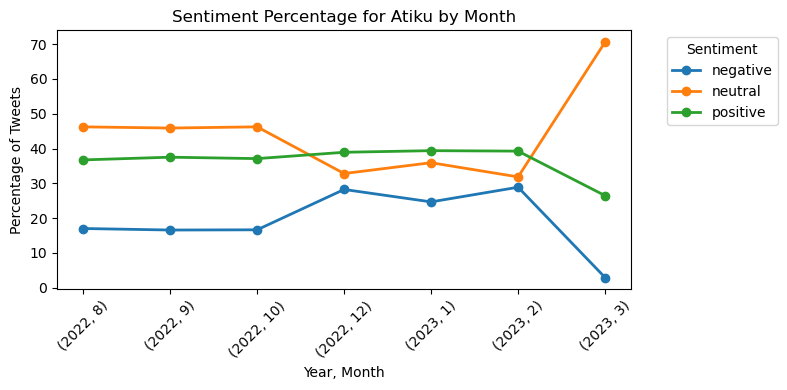

In [9]:
# Filter the DataFrame for the candidate 'Atiku'
df_atiku = df[df['Candidate_name'] == 'Atiku'].copy()

# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Calculate sentiment percentage for Atiku grouped by year
sentiment_percentage_table = calculate_sentiment_percentage(df_atiku)

# Plot the result
def plot_sentiment_percentage(data, title):
    data.plot(kind='line', figsize=(8, 4), marker='o', linewidth=2, markersize=6)
    plt.title(title)
    plt.xlabel('Year, Month')
    plt.ylabel('Percentage of Tweets')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot sentiment percentage for Atiku
plot_sentiment_percentage(sentiment_percentage_table, 'Sentiment Percentage for Atiku by Month')

In [27]:
# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Filter the DataFrame for the candidate 'Obi'
df_obi = df[df['Candidate_name'] == 'Obi'].copy()

# Calculate sentiment percentage for Obi grouped by year
sentiment_percentage_table_obi = calculate_sentiment_percentage(df_obi)

# Print the result
print(sentiment_percentage_table_obi)

sentiment    negative    neutral   positive
Year Month                                 
2022 8      17.985729  37.352710  44.661561
     9      15.924557  39.897505  44.177938
     10     11.782716  46.207728  42.009556
     12     25.925926  28.104575  45.969499
2023 1      25.634726  26.781327  47.583948
     2      21.755319  37.819149  40.425532
     3      14.062500  41.118421  44.819079


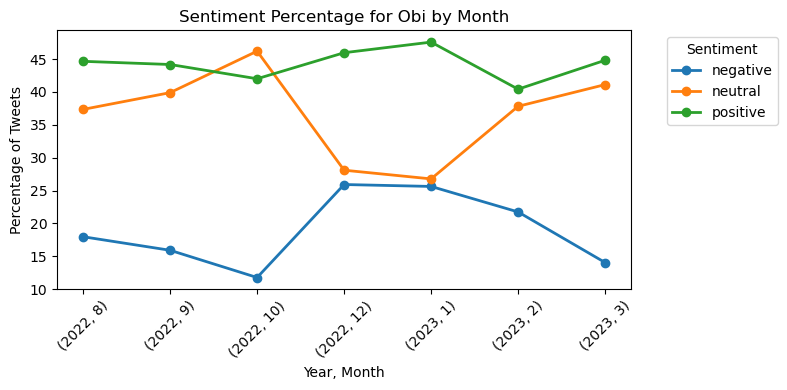

In [7]:
df_obi = df[df['Candidate_name'] == 'Obi'].copy()

# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Calculate sentiment percentage for Obi grouped by year
sentiment_percentage_table = calculate_sentiment_percentage(df_obi)

# Plot the result
def plot_sentiment_percentage(data, title):
    data.plot(kind='line', figsize=(8, 4), marker='o', linewidth=2, markersize=6)
    plt.title(title)
    plt.xlabel('Year, Month')
    plt.ylabel('Percentage of Tweets')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot sentiment percentage for Obi
plot_sentiment_percentage(sentiment_percentage_table, 'Sentiment Percentage for Obi by Month')

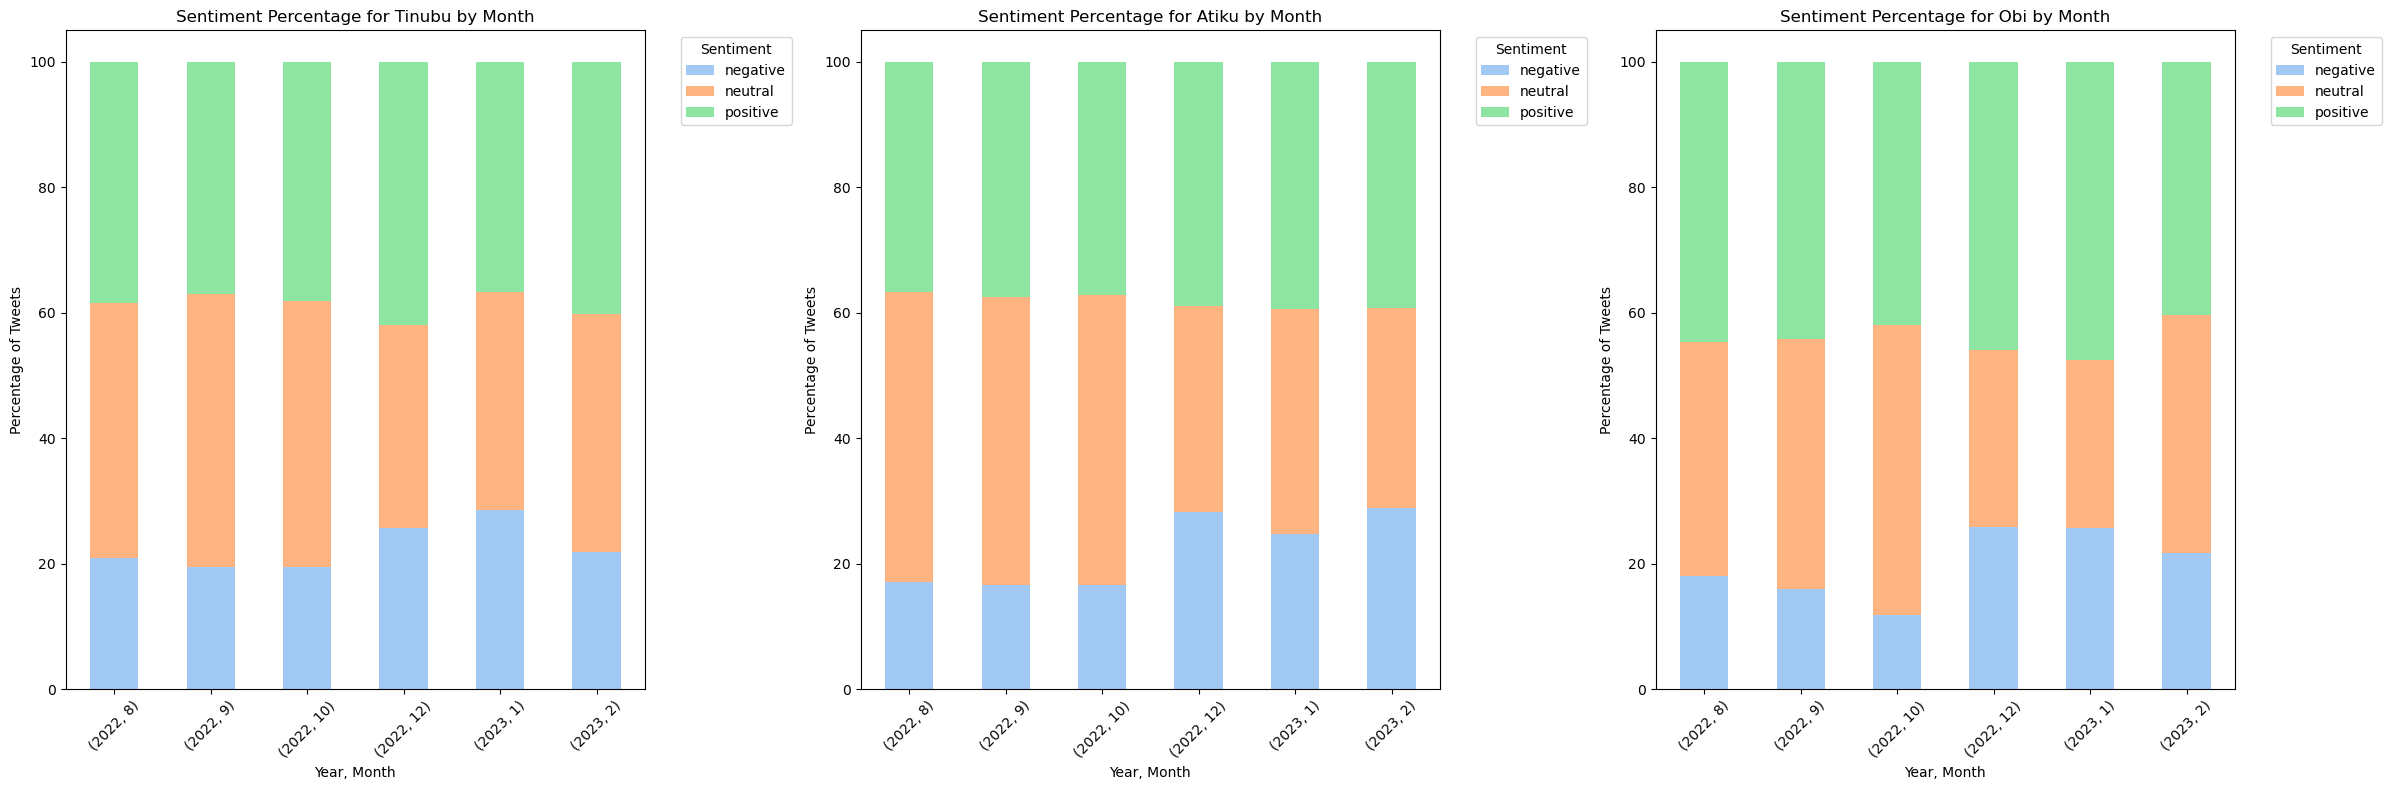

In [12]:
# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Plot the result
def plot_sentiment_percentage(ax, data, title):
    data.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette('pastel'))
    ax.set_title(title)
    ax.set_xlabel('Year, Month')
    ax.set_ylabel('Percentage of Tweets')
    ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

# Create separate DataFrames for each candidate and exclude the third month
df_tinubu = df[(df['Candidate_name'] == 'Tinubu') & (df['Month'] != 3)].copy()
df_atiku = df[(df['Candidate_name'] == 'Atiku') & (df['Month'] != 3)].copy()
df_obi = df[(df['Candidate_name'] == 'Obi') & (df['Month'] != 3)].copy()

# Calculate sentiment percentages
sentiment_percentage_tinubu = calculate_sentiment_percentage(df_tinubu)
sentiment_percentage_atiku = calculate_sentiment_percentage(df_atiku)
sentiment_percentage_obi = calculate_sentiment_percentage(df_obi)

# Plot the sentiment percentages side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

plot_sentiment_percentage(axs[0], sentiment_percentage_tinubu, 'Sentiment Percentage for Tinubu by Month')
plot_sentiment_percentage(axs[1], sentiment_percentage_atiku, 'Sentiment Percentage for Atiku by Month')
plot_sentiment_percentage(axs[2], sentiment_percentage_obi, 'Sentiment Percentage for Obi by Month')

plt.tight_layout()
plt.show()

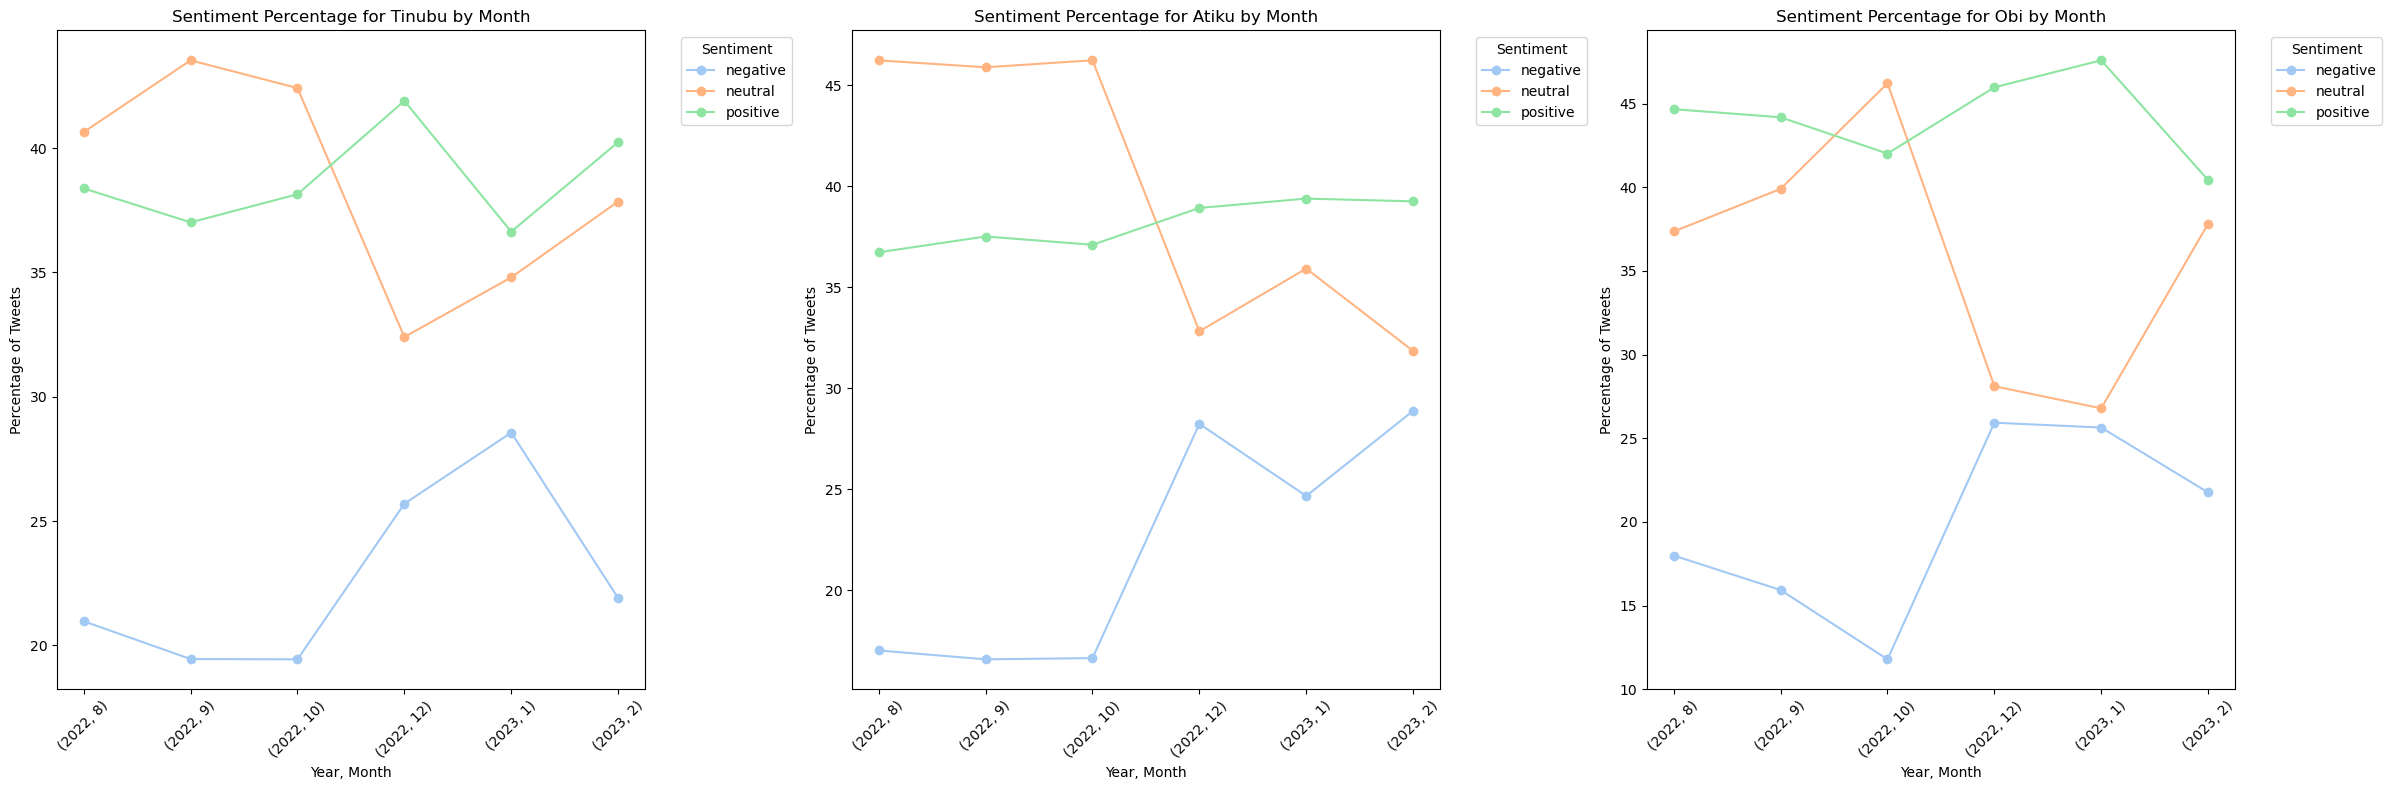

In [13]:
# Function to calculate the percentage of each sentiment per month grouped by year
def calculate_sentiment_percentage(data):
    # Group by year, month, and sentiment, then count occurrences
    sentiment_trend = data.groupby(['Year', 'Month', 'sentiment']).size().reset_index(name='counts')
    
    # Calculate the total number of tweets per month per year
    total_per_month = sentiment_trend.groupby(['Year', 'Month'])['counts'].sum().reset_index(name='total_counts')
    
    # Merge the total counts back with the sentiment trend data
    sentiment_trend = sentiment_trend.merge(total_per_month, on=['Year', 'Month'])
    
    # Calculate the percentage
    sentiment_trend['percentage'] = (sentiment_trend['counts'] / sentiment_trend['total_counts']) * 100
    
    # Pivot the data to have months as rows and sentiments as columns, grouped by year
    pivot_table = sentiment_trend.pivot_table(index=['Year', 'Month'], columns='sentiment', values='percentage', fill_value=0)
    
    return pivot_table

# Plot the result as a line graph
def plot_sentiment_percentage(ax, data, title):
    data.plot(kind='line', marker='o', ax=ax, color=sns.color_palette('pastel'))
    ax.set_title(title)
    ax.set_xlabel('Year, Month')
    ax.set_ylabel('Percentage of Tweets')
    ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

# Create separate DataFrames for each candidate and exclude the third month
df_tinubu = df[(df['Candidate_name'] == 'Tinubu') & (df['Month'] != 3)].copy()
df_atiku = df[(df['Candidate_name'] == 'Atiku') & (df['Month'] != 3)].copy()
df_obi = df[(df['Candidate_name'] == 'Obi') & (df['Month'] != 3)].copy()

# Calculate sentiment percentages
sentiment_percentage_tinubu = calculate_sentiment_percentage(df_tinubu)
sentiment_percentage_atiku = calculate_sentiment_percentage(df_atiku)
sentiment_percentage_obi = calculate_sentiment_percentage(df_obi)

# Plot the sentiment percentages side by side
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

plot_sentiment_percentage(axs[0], sentiment_percentage_tinubu, 'Sentiment Percentage for Tinubu by Month')
plot_sentiment_percentage(axs[1], sentiment_percentage_atiku, 'Sentiment Percentage for Atiku by Month')
plot_sentiment_percentage(axs[2], sentiment_percentage_obi, 'Sentiment Percentage for Obi by Month')

plt.tight_layout()
plt.show()

.

.

Mach

In [7]:
X = df['cleaned_tweet'].fillna('')  # Features (cleaned tweets)
y = df['sentiment']      # Target variable (sentiment)

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Verify the split
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 248525
Testing set size: 53256


In [8]:
# Initialize vectorizers
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

# Transform the text data using BoW
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_val_bow = vectorizer_bow.transform(X_val)
X_test_bow = vectorizer_bow.transform(X_test)

# Transform the text data using TF-IDF
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_val_tfidf = vectorizer_tfidf.transform(X_val)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [9]:
# Function to evaluate and print results
def evaluate_model(model, X_val, y_val, X_test, y_test):
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)
    print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
    print("Test Accuracy:", accuracy_score(y_test, test_predictions))
    print("Classification Report:\n", classification_report(y_test, test_predictions))

In [10]:
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

# Transform the text data using BoW
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# Transform the text data using TF-IDF
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [11]:
# Logistic Regression model using Bag of Words features
model_bow = LogisticRegression()
model_bow.fit(X_train_bow, y_train)
print("Logistic Regression with Bag of Words")
evaluate_model(model_bow, X_val_bow, y_val, X_test_bow, y_test)

# Logistic Regression model using TF-IDF features
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)
print("\nLogistic Regression with TF-IDF")
evaluate_model(model_tfidf, X_val_tfidf, y_val, X_test_tfidf, y_test)

C:\Users\TAI EMMANUEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with Bag of Words
Validation Accuracy: 0.9765847979570377
Test Accuracy: 0.976472134595163
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.94      0.95      8985
     neutral       0.99      0.99      0.99     24382
    positive       0.98      0.98      0.98     19889

    accuracy                           0.98     53256
   macro avg       0.97      0.97      0.97     53256
weighted avg       0.98      0.98      0.98     53256



C:\Users\TAI EMMANUEL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression with TF-IDF
Validation Accuracy: 0.9567184918131291
Test Accuracy: 0.9557232987832357
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.87      0.91      8985
     neutral       0.95      0.99      0.97     24382
    positive       0.96      0.95      0.96     19889

    accuracy                           0.96     53256
   macro avg       0.96      0.94      0.95     53256
weighted avg       0.96      0.96      0.96     53256



In [12]:
# Naive Bayes Model using BoW features
nb_bow_model = MultinomialNB()
nb_bow_model.fit(X_train_bow, y_train)
print("\nNaive Bayes with Bag of Words")
evaluate_model(nb_bow_model, X_val_bow, y_val, X_test_bow, y_test)

# Naive Bayes Model using TF-IDF features
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train)
print("\nNaive Bayes with TF-IDF")
evaluate_model(nb_tfidf_model, X_val_tfidf, y_val, X_test_tfidf, y_test)


Naive Bayes with Bag of Words
Validation Accuracy: 0.8480359020579841
Test Accuracy: 0.849425416854439
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.71      0.76      8985
     neutral       0.95      0.83      0.89     24382
    positive       0.77      0.94      0.85     19889

    accuracy                           0.85     53256
   macro avg       0.85      0.82      0.83     53256
weighted avg       0.86      0.85      0.85     53256


Naive Bayes with TF-IDF
Validation Accuracy: 0.7880238846327174
Test Accuracy: 0.7935631665915578
Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.18      0.31      8985
     neutral       0.90      0.89      0.90     24382
    positive       0.69      0.95      0.80     19889

    accuracy                           0.79     53256
   macro avg       0.86      0.67      0.67     53256
weighted avg       0.84      0.79      0.7

In [13]:
# KNN Model using BoW features
knn_bow_model = KNeighborsClassifier(n_neighbors=5)
knn_bow_model.fit(X_train_bow, y_train)
print("\nKNN with Bag of Words")
evaluate_model(knn_bow_model, X_val_bow, y_val, X_test_bow, y_test)

# KNN Model using TF-IDF features
knn_tfidf_model = KNeighborsClassifier(n_neighbors=5)
knn_tfidf_model.fit(X_train_tfidf, y_train)
print("\nKNN with TF-IDF")
evaluate_model(knn_tfidf_model, X_val_tfidf, y_val, X_test_tfidf, y_test)



KNN with Bag of Words
Validation Accuracy: 0.565401081568274
Test Accuracy: 0.5655888538380652
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.12      0.20      8985
     neutral       0.52      0.99      0.68     24382
    positive       0.94      0.24      0.39     19889

    accuracy                           0.57     53256
   macro avg       0.75      0.45      0.42     53256
weighted avg       0.72      0.57      0.49     53256


KNN with TF-IDF
Validation Accuracy: 0.5137637073756948
Test Accuracy: 0.514101697461319
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.09      0.17      8985
     neutral       0.49      0.99      0.65     24382
    positive       0.92      0.12      0.21     19889

    accuracy                           0.51     53256
   macro avg       0.75      0.40      0.34     53256
weighted avg       0.71      0.51      0.41     53256



In [ ]:
# SVM using Bag of Words
svm_bow = SVC(kernel='linear')
svm_bow.fit(X_train_bow, y_train)
print("\nSVM with Bag of Words")
evaluate_model(svm_bow, X_val_bow, y_val, X_test_bow, y_test)

# SVM using TF-IDF
svm_tfidf = SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train)
print("\nSVM with TF-IDF")
evaluate_model(svm_tfidf, X_val_tfidf, y_val, X_test_tfidf, y_test)

In [14]:
# Reduce the training data size for quicker training
X_train_bow_small = X_train_bow[:1000]
y_train_small = y_train[:1000]
X_train_tfidf_small = X_train_tfidf[:1000]

# Neural Network model using BoW features
nn_bow_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)
nn_bow_model.fit(X_train_bow_small, y_train_small)
print("Neural Network with Bag of Words")
evaluate_model(nn_bow_model, X_val_bow, y_val, X_test_bow, y_test)

# Neural Network model using TF-IDF features
nn_tfidf_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=42)
nn_tfidf_model.fit(X_train_tfidf_small, y_train_small)
print("\nNeural Network with TF-IDF")
evaluate_model(nn_tfidf_model, X_val_tfidf, y_val, X_test_tfidf, y_test)

C:\Users\TAI EMMANUEL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network with Bag of Words
Validation Accuracy: 0.6529592909719093
Test Accuracy: 0.655118672074508
Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.29      0.38      8985
     neutral       0.65      0.82      0.73     24382
    positive       0.69      0.62      0.65     19889

    accuracy                           0.66     53256
   macro avg       0.63      0.58      0.59     53256
weighted avg       0.65      0.66      0.64     53256



C:\Users\TAI EMMANUEL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network with TF-IDF
Validation Accuracy: 0.6122314856541986
Test Accuracy: 0.6155175003755445
Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.27      0.35      8985
     neutral       0.64      0.73      0.68     24382
    positive       0.61      0.63      0.62     19889

    accuracy                           0.62     53256
   macro avg       0.58      0.54      0.55     53256
weighted avg       0.61      0.62      0.60     53256



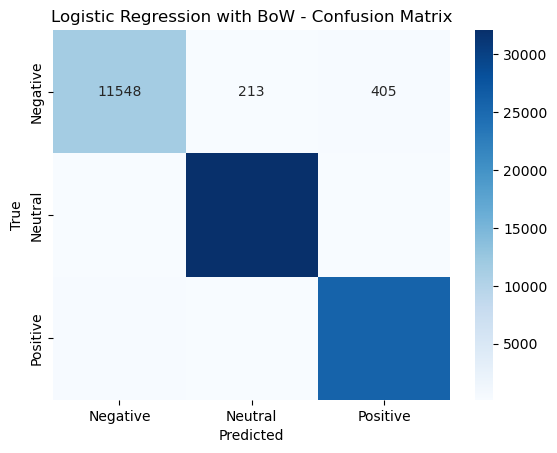

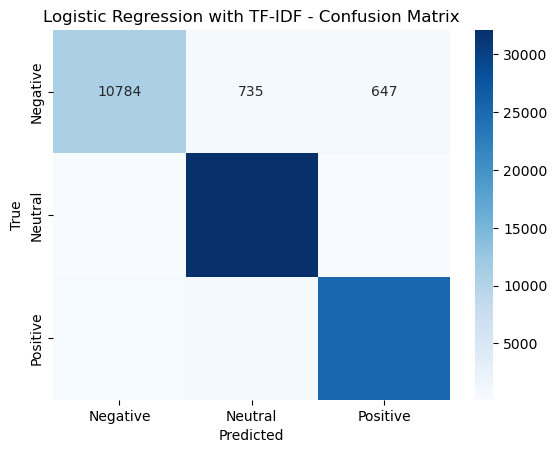

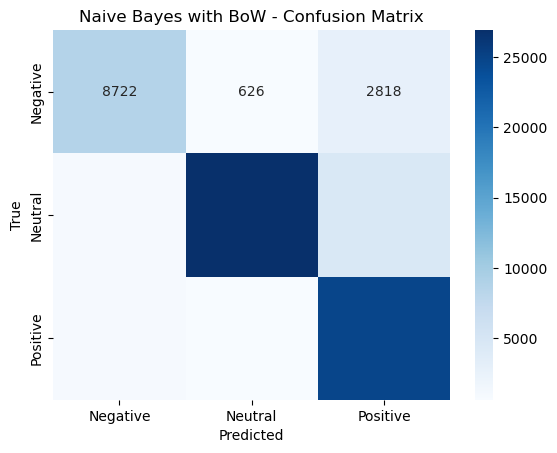

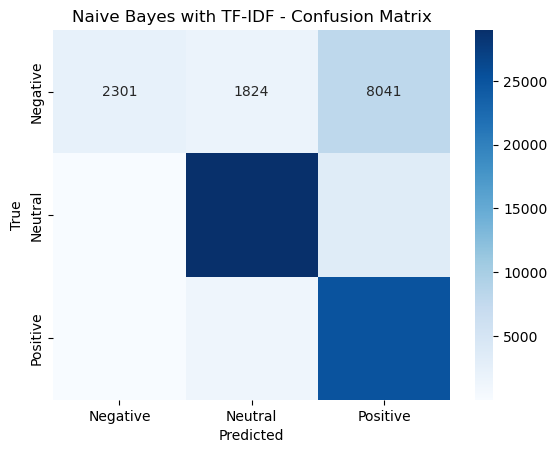

NameError: name 'y_pred_knn_bow' is not defined

In [17]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


plot_confusion_matrix(y_test, y_pred_bow, 'Logistic Regression with BoW - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_tfidf, 'Logistic Regression with TF-IDF - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_nb_bow, 'Naive Bayes with BoW - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_nb_tfidf, 'Naive Bayes with TF-IDF - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_knn_bow, 'KNN with BoW - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_knn_tfidf, 'KNN with TF-IDF - Confusion Matrix')

plot_confusion_matrix(y_test, y_pred_nn_bow, 'Neural Network with BoW - Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_nn_tfidf, 'Neural Network with TF-IDF - Confusion Matrix')

